In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
data_train_path = '/content/drive/MyDrive/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height =180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 365 files belonging to 36 classes.


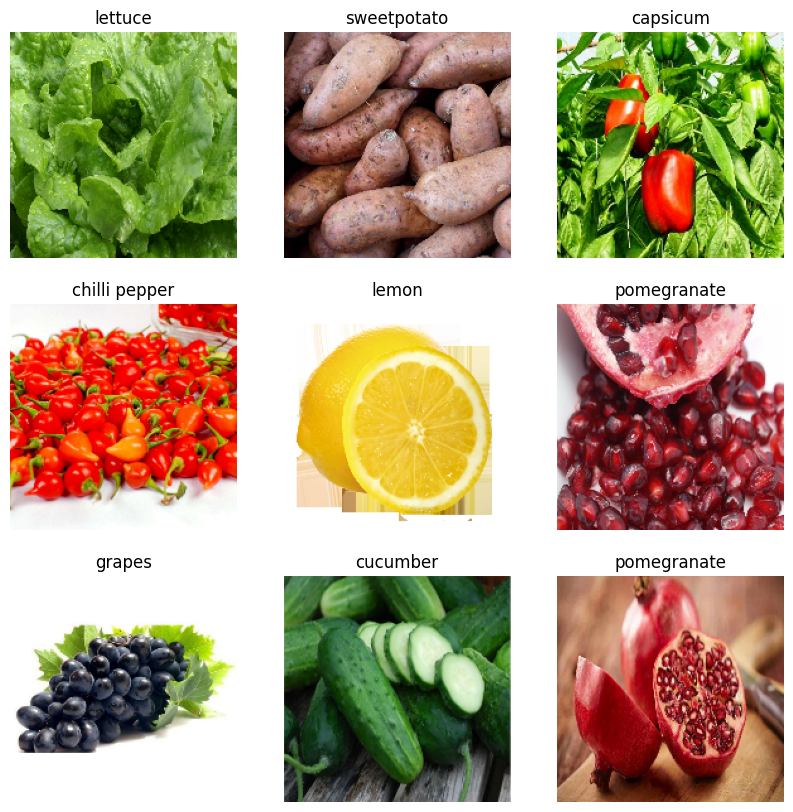

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, callbacks=[early_stopping])


Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 545s 6s/step - accuracy: 0.0560 - loss: 4.1931 - val_accuracy: 0.3077 - val_loss: 2.6299
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.2639 - loss: 2.6383 - val_accuracy: 0.5840 - val_loss: 1.5068
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4505 - loss: 1.8840 - val_accuracy: 0.7949 - val_loss: 0.8328
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6555 - loss: 1.1770 - val_accuracy: 0.8319 - val_loss: 0.6935
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.7966 - loss: 0.6950 - val_accuracy: 0.9088 - val_loss: 0.4437
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8845 - loss: 0.4100 - val_accuracy: 0.9430 - val_loss: 0.3598
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9290 - loss: 0.2636 - val_accuracy: 0.9573 - val_loss: 0.2913
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9671 - loss: 0.1501 - val_accuracy: 0.9402 - v

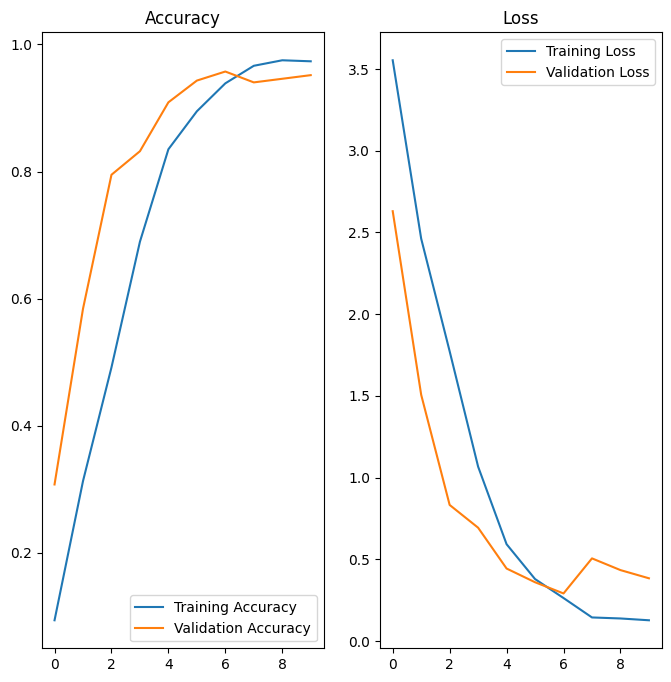

In [17]:
# Adjust epochs_range to match the actual training length
epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(8, 8))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


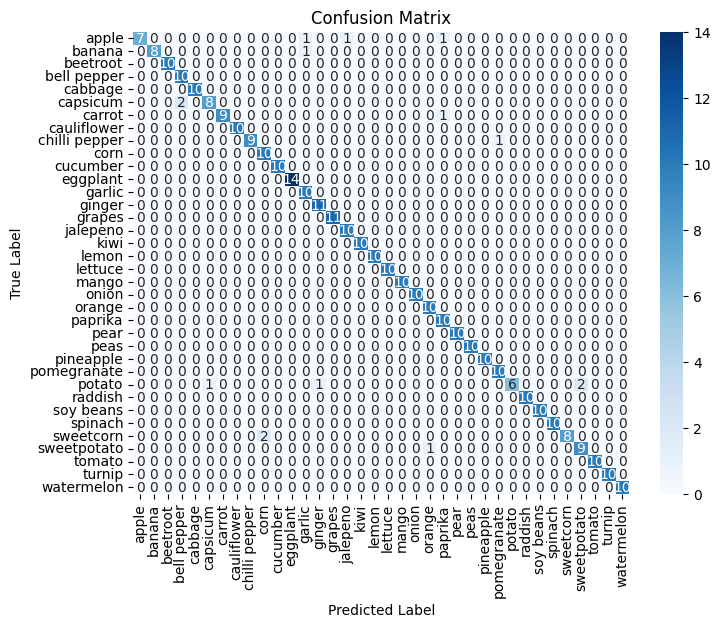

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, data_test):
    # Get true labels and predictions
    y_true = np.concatenate([y for x, y in data_test], axis=0)
    y_pred_probs = model.predict(data_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    class_names = data_test.class_names  # Assuming the dataset has class names

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function after training
plot_confusion_matrix(model, data_test)


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
image = '/content/mango1.webp'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [31]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [32]:
score = tf.nn.softmax(predict)

In [33]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is mango with accuracy of 31.04


In [34]:
model.save('Image_classify.keras')

In [38]:
from google.colab import files
import tensorflow as tf

# Upload a file
uploaded = files.upload()

# Get the first uploaded file
file_path = list(uploaded.keys())[0]
print(f"Selected file: {file_path}")

# Load and process the image
img_height, img_width = 224, 224  # Change based on model requirements
image = tf.keras.utils.load_img(file_path, target_size=(img_height, img_width))

# Convert to array and create a batch
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

print("Image successfully loaded and processed!")


Saving Mango.jpeg to Mango (2).jpeg
Selected file: Mango (2).jpeg
Image successfully loaded and processed!
